Методы без учителя содержат неразмеченные данные. К таким методам относится кластеризация. Цель -- выявить закономерности и определить структуру данных.
Методы с учителем имеют размеченную базу данных. К таки относятся классификация и регрессия. Цель -- предсказать результат.

Популярные алгоритмы кластеризации: 
K-Means -- разбивает данные на K кластеров, минимизируя расстояние до центра.
DBSCAN -- обнаруживает кластеры произвольной формы, устойчив к шуму.
Hierarchical -- строит дерево кластеров (дендрограмму) путем последовательного объединения или деления.

k-Means выделяет только выпуклые кластеры, сходного размера. Не очень хорошо работает с шумными данными. Хуже видит аномалии. С другой стороны, k-means лучше справляется с большими данными и размерностью, а также разреженными данными с переменной плотностью (DBSCAN скорее относит разные плотности к разным кластерам).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN


In [2]:
X, y = make_moons(n_samples=500, noise=0.1)

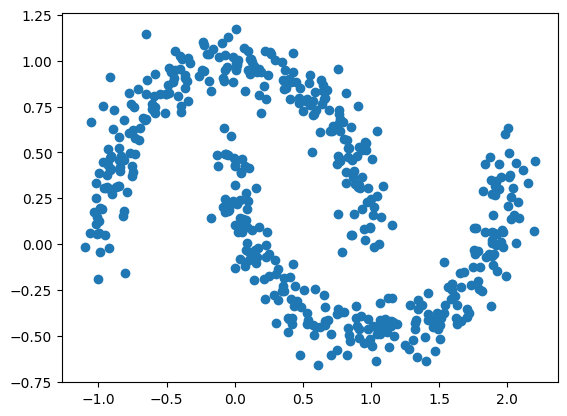

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
import matplotlib as mpl

def get_colours(clusters):
    n_clusters = len(np.unique(clusters[clusters != -1]))

    palette = mpl.colormaps['viridis'].resampled(n_clusters)(np.linspace(0, 1, n_clusters))
    colors = np.zeros((clusters.shape[0], 4))
    colors[clusters != -1] = palette[clusters[clusters != -1]]

    colors[clusters == -1] = [0.5, 0.5, 0.5, 0.3]

    return colors

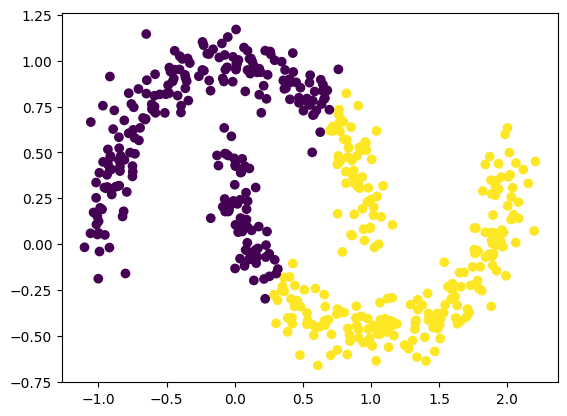

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

colors = get_colours(clusters)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

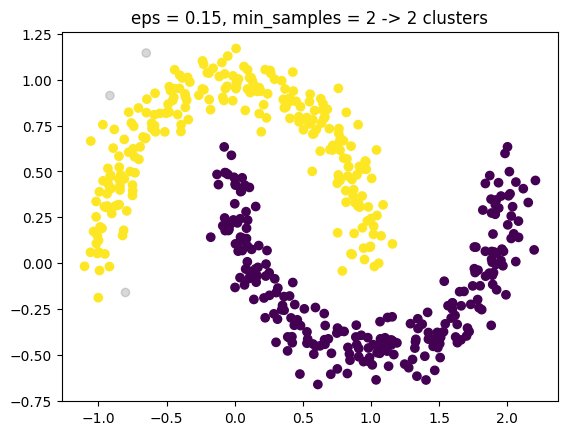

In [6]:
dbscan = DBSCAN(eps=0.15, min_samples=2)
clusters = dbscan.fit_predict(X)

colors = get_colours(clusters)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title('eps = {}, min_samples = {} -> {} clusters'.format(dbscan.eps, dbscan.min_samples, len(np.unique(clusters[clusters != -1]))))
plt.show()

In [7]:
X, y = make_circles(n_samples = 500, noise = 0.05, factor = 0.5)

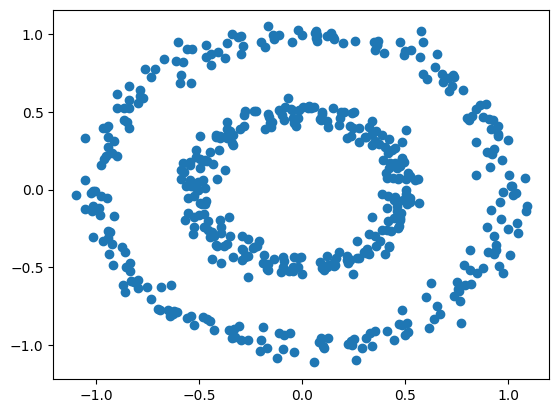

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.show()

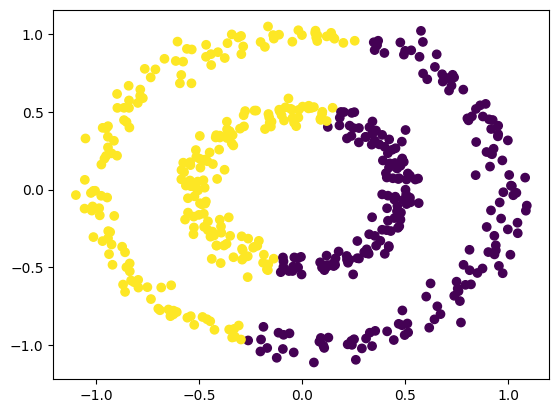

In [9]:
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

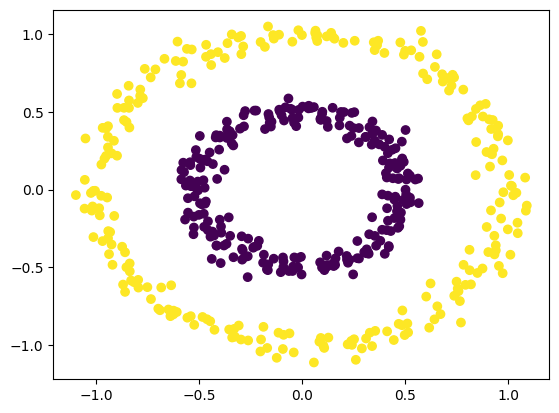

In [ ]:
# примените алгоритм DBSCAN к этому же датасету и визуализируйте
dbscan = DBSCAN(eps = 0.15, min_samples = 2) #eps - радиус окрестности 
clusters = dbscan.fit_predict(X)

colors = get_colours(clusters)
plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.show() #доделать

dbscan = DBSCAN(eps=0.15, min_samples=2)
clusters = dbscan.fit_predict(X)

colors = get_colours(clusters)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title('eps = {}, min_samples = {} -> {} clusters'.format(dbscan.eps, dbscan.min_samples, len(np.unique(clusters[clusters != -1]))))
plt.show()

K-meams (2 часть задания)

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
plt.rcParams['figure.figsize'] = [11, 8]

In [25]:
from sklearn.cluster import KMeans

np.random.seed(123)
X1 = np.random.randn(100, 2)
X2 = np.random.randn(100, 2) - np.array([10,1])
X3 = np.random.randn(100, 2) - np.array([1,10])
X = np.vstack((X1, X2, X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

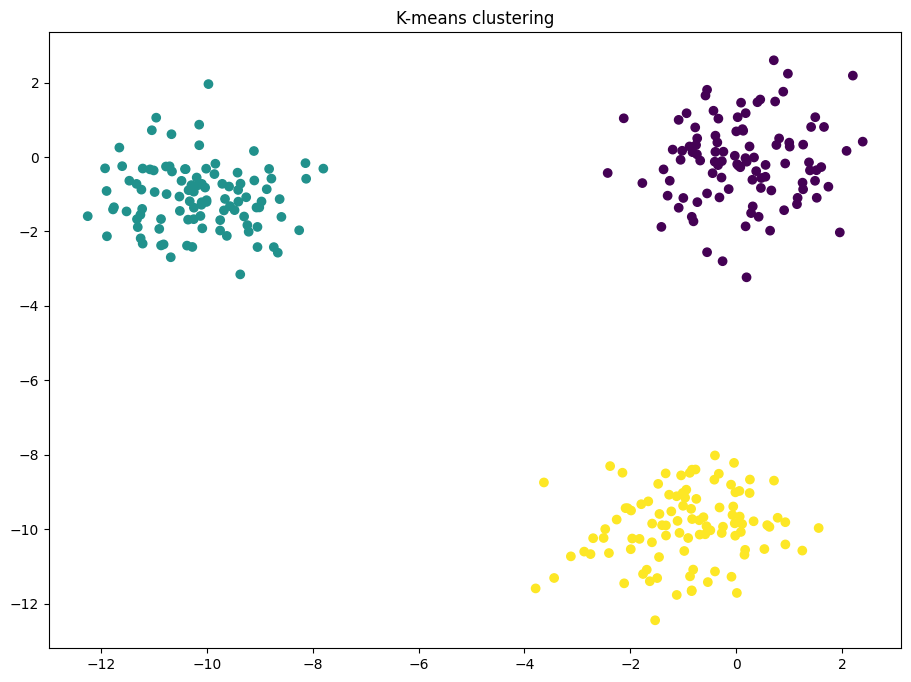

In [26]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

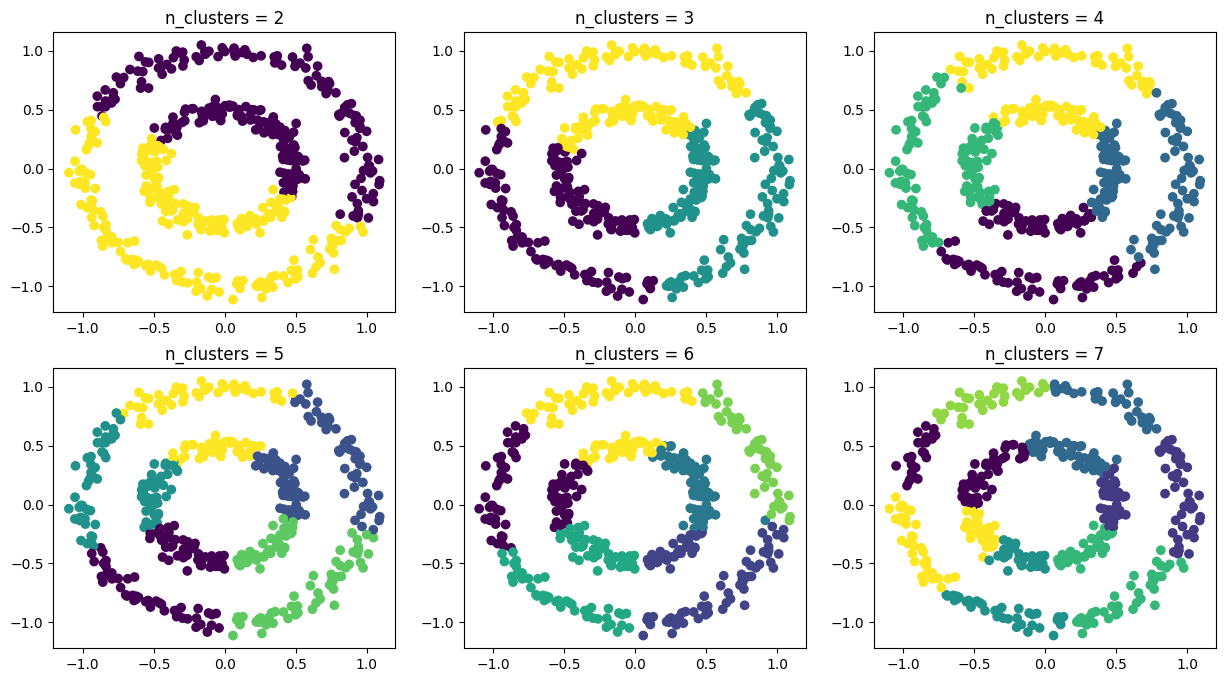

In [12]:
#не угадали с числом кластеров 
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

best_k, best_sil = None, -1

# Код ниже разбивает данные на 2 кластера с помощью алгоритма K-среднее и вычисляет индекс силуэта.
# Скорректируйте  код таким образом, чтобы рассмотреть разбиения на разное количество кластеров (от 3 до 8) и найти лучшее по индексу силуэта.
# Используйте цикл for.
# Индекс силуэта
#Мера от -1 до 1, показывает насколько хорошо точки находятся внутри своего кластера и отделены от других.Ближе к 1 — лучше кластеризация.
for n_c in range(3,9):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    sil = np.round(silhouette_score(X=X,
                          labels=clusters), 2) #Считается сила для каждого значения `n_clusters` от 3 до 8. Мы выбираем наилучшее значение `k` по индексу силуэта
    if sil > best_sil:
        best_sil = sil
        best_k = n_c
#Коэффициент силуэта рассчитывается с использованием среднего внутрикластерного расстояния (a) и 
#среднего расстояния до ближайшего кластера (b) для каждого образца. Коэффициент силуэта для образца равен (b - a) / max(a, b). 
#Для ясности, b — это расстояние между образцом и ближайшим кластером, частью которого образец не является.

print('Best score {}, k = {}'.format(best_sil, best_k))  # после подсчетов выведите результаты

Best score 0.82, k = 3
